# Final Assignment 52002/52019 - 2023-24 - Part 1 BigQuery & SQL [35 pts]


BigQuery is Google's serverless data warehouse that enables scalable analysis   
over petabytes of data. It is a Platform as a Service (PaaS) that supports querying   
using SQL. In this part of the midterm you'll be asked to query BigQuery tables    
using its python API. Please use the `sandbox` BigQuery environment and query   
only public datasets.

**Grading:**
Each subquestion in this part is worth **5** points for the final work grade.

**Please note:**
Your BigQuery's resources are limited to 1 TB per user per month - be mindful with how many queries you   
execute and try to optimize your queries as much as possible.


**Guidelines:**  
1. Fill this notebook with python commands including SQL queries in the designated places,  
 run it using a jupyter notebook environment (e.g. google colab), save the resulting   
 ipynb file with the results before submitting.
2. Please write efficient SQL queries and code. Points may be taken off for     
    inefficient queries and code.
3. The python API enables us to write code that interacts with BigQuery and convert   
between the SQL tables to python objects, thus allowing analysis and plotting using   
python code. You should write your SQL commands within the API. It is recommended to   
browse the dataset in the BigQuery web-browser, and try running your SQL command  
 there before copying it to the python notebool.      
4. Please only use the method `dataframe.plot.[kind]()` to create visuzalizations,   
where `[kind]` refers to the type of plot that you want to use.
   In addition, your plots should be clear, with titles, and with propoer x-y labels.
5. When reading BigQuery tables, used the `` symbols to around the table's name.  
6. Please make sure yout figures are legible/readible.    
7. You can use the sample `bigquery_sample_python_notebook` for some query examples.   


FOR SUBMISSION:
PLEASE SUBMIT THE FOLLOWING:
1. Your fully executed IPYNB file (with the expected output)
2. A PDF/HTML import of your executed IPYNB file (with the expected output)

SUBMISSIONS WITHOUT OUTPUTS WILL NOT BE GRADED!!

Requirements:
- `google-cloud` client library + `google-cloud-bigquery`    
  (https://cloud.google.com/python/docs/reference/bigquery/latest)
- Google Cloud authentication:
  In your linux shell , execute:   
  `gloud init` and then also
  `gcloud auth application-default login` and  follow instructions.

**Necessary Libraries:**  
(Do not use any libraries that are not in this list without permission form the course staff)

In [124]:
import pandas as pd
import matplotlib as plt
from google.cloud import bigquery
from sqlite3 import connect
import matplotlib.pyplot as plt

In [125]:
# Construct a BigQuery client
my_project_name = "final-project-418818" # fill in your project's name
client = bigquery.Client(project=my_project_name)

San Francisco datasets

In [126]:
san_fan_films_locs = "bigquery-public-data.san_francisco.film_locations"
san_fan_service_reqs = "bigquery-public-data.san_francisco.311_service_requests"
san_fan_pd_incidents = "bigquery-public-data.san_francisco.sfpd_incidents"
san_fan_fd_incidents = "bigquery-public-data.san_francisco.sffd_service_calls"

### Q1) Basic Usage

Q1.a) Execute a query that select 1000 rows from `bigquery-public-data.san_francisco.film_locations`,    
then saves the results using the `.results()` method. Finally print the first 2 rows.

SOLUTION:

In [127]:

# Insert the query below
QUERY = ("""
SELECT *
FROM {}
LIMIT 1000
 """.format(san_fan_films_locs))

# Execute the query
query_job_1a = client.query(QUERY)  # API request
results_1a = query_job_1a.result()  # Waits for query to finish
rows_list = list(results_1a)

#Printing the results of the first 2 rows
for row in rows_list[:2]:
    print(row)


Row(('A Jitney Elopement', 1915, '20th and Folsom Streets', '', 'The Essanay Film Manufacturing Company', 'General Film Company', 'Charles Chaplin', 'Charles Chaplin', 'Charles Chaplin', 'Edna Purviance', ''), {'title': 0, 'release_year': 1, 'locations': 2, 'fun_facts': 3, 'production_company': 4, 'distributor': 5, 'director': 6, 'writer': 7, 'actor_1': 8, 'actor_2': 9, 'actor_3': 10})
Row(('A Jitney Elopement', 1915, 'Golden Gate Park', 'During San Francisco\'s Gold Rush era, the Park was part of an area designated as the "Great Sand Waste".', 'The Essanay Film Manufacturing Company', 'General Film Company', 'Charles Chaplin', 'Charles Chaplin', 'Charles Chaplin', 'Edna Purviance', ''), {'title': 0, 'release_year': 1, 'locations': 2, 'fun_facts': 3, 'production_company': 4, 'distributor': 5, 'director': 6, 'writer': 7, 'actor_1': 8, 'actor_2': 9, 'actor_3': 10})


Q1.b) Using the saved results object from the query in (1.a), load the results  
into a pandas DataFrame.
Hint: you can retrieve the header using `query.result().schema`.  
Print the first 5 rows of the dataframe.

SOLUTION:

In [128]:

# Extract column names
columns = [field.name for field in results_1a.schema]

# Define the rows as a list comprehension
data = [{field.name: row[field.name] for field in results_1a.schema} for row in rows_list]

# Create a DataFrame
df_films = pd.DataFrame(data)

# Display the first 5 rows
print(df_films.head(5))



                title  release_year                locations  \
0  A Jitney Elopement          1915  20th and Folsom Streets   
1  A Jitney Elopement          1915         Golden Gate Park   
2       San Francisco          1936        The Barbary Coast   
3       San Francisco          1936                City Hall   
4  After the Thin Man          1936               Coit Tower   

                                           fun_facts  \
0                                                      
1  During San Francisco's Gold Rush era, the Park...   
2  The Barbary Coast was a red-light district tha...   
3  The dome of SF's City Hall is almost a foot ta...   
4  The Tower was funded by a gift bequeathed by L...   

                       production_company           distributor  \
0  The Essanay Film Manufacturing Company  General Film Company   
1  The Essanay Film Manufacturing Company  General Film Company   
2                     Metro-Goldwyn Mayer   Metro-Goldwyn Mayer   
3         

Q1.c) Query the table to get the number of total distinct films that were filmed in San Francisco in each year in a decreasing order (by year).  
Using the method `.plot` on a dataframe, display the results visually (you do not need to print the output table of the query itself).   
What was the year with most films released?


SOLUTION:

The year with the most films released in San Francisco was 2015 with 23 films.


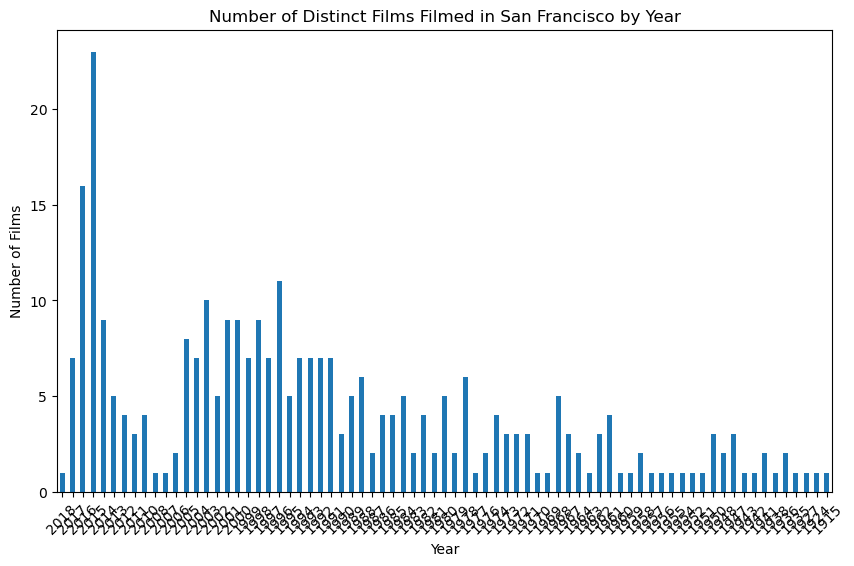

In [129]:
# Insert query below between the two triple-parenthesis
QUERY = ("""
SELECT release_year, COUNT(DISTINCT title) AS num_films
FROM `bigquery-public-data.san_francisco.film_locations`
WHERE release_year IS NOT NULL
GROUP BY release_year
ORDER BY release_year DESC
""".format(san_fan_films_locs))

query_job_1c = client.query(QUERY)  # API request
results_1c = query_job_1c.result()  # Waits for query to finish

# Add code here to plot the results
# Extract data from the results and create a list of dictionaries
data = [{field.name: row[field.name] for field in results_1c.schema} for row in results_1c]

# Create a DataFrame
df_films_year = pd.DataFrame(data)

# Plotting 
ax = df_films_year.plot(kind='bar', x='release_year', y='num_films', figsize=(10, 6), legend=None)
ax.set_title('Number of Distinct Films Filmed in San Francisco by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Films')
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Finding the year with the most films released
year_most_films = df_films_year.loc[df_films_year['num_films'].idxmax()]
print(f"The year with the most films released in San Francisco was {year_most_films['release_year']} with {year_most_films['num_films']} films.")

Q1.d) Query the table to get the most popular filming locations.  
Using the method `.plot` on a dataframe, display the results visually, with the top-20 locations sorted by popularity.   


SOLUTION:

Text(0.5, 1.0, 'Top 20 Filming Locations in San Francisco')

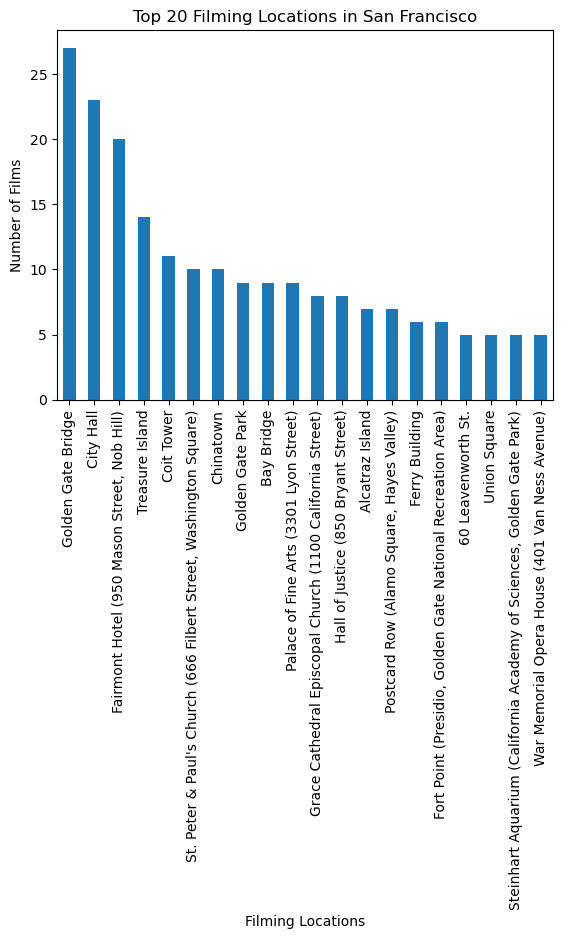

In [130]:
# Define the query
QUERY = """
SELECT locations, COUNT(*) AS filming_count
FROM `bigquery-public-data.san_francisco.film_locations`
WHERE locations IS NOT NULL AND locations != ''
GROUP BY locations
ORDER BY filming_count DESC
LIMIT 20
"""

# Execute the query
query_job_1d = client.query(QUERY)  # API request
results_1d = query_job_1d.result()  # Waits for query to finish

# Extract data from the results and create a list of dictionaries
data_1d = [{field.name: value for field, value in zip(results_1d.schema, row)} for row in results_1d]

# Create a DataFrame from the list of dictionaries
df_locations = pd.DataFrame(data_1d)

# Plot the results
ax = df_locations.plot(kind='bar', x='locations', y='filming_count', legend=None, rot=90)
ax.set_xlabel('Filming Locations')
ax.set_ylabel('Number of Films')
ax.set_title('Top 20 Filming Locations in San Francisco')


### Q2) San Francisco Police and Fire Department calls/incidents

Q2.a) For the `san_fan_pd_incidents` table
write a query that returns the most common `category` for each `weekday`.  Print the resulting table with one row per day of the week.   
Hint: there are many ways to achieve it, it is recommended to simplify the query     
using `WITH` table and a window function.

In [131]:
QUERY = """
WITH daily_category_counts AS (
  SELECT
    dayofweek,
    category,
    COUNT(*) AS category_count,
    ROW_NUMBER() OVER (PARTITION BY dayofweek ORDER BY COUNT(*) DESC) AS rn
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents`
  WHERE
    dayofweek IS NOT NULL
  GROUP BY
    dayofweek,
    category
)
SELECT
  dayofweek,
  category,
  category_count
FROM
  daily_category_counts
WHERE
  rn = 1
ORDER BY
  dayofweek;
"""

# Execute the query
query_job_2a = client.query(QUERY)

# Fetch the results
results_2a = query_job_2a.result()

# Print the results
for row in results_2a:
    print(f"Day of Week: {row['dayofweek']}, Category: {row['category']}, Category Count: {row['category_count']}")


Day of Week: Friday, Category: LARCENY/THEFT, Category Count: 72722
Day of Week: Monday, Category: LARCENY/THEFT, Category Count: 62526
Day of Week: Saturday, Category: LARCENY/THEFT, Category Count: 72580
Day of Week: Sunday, Category: LARCENY/THEFT, Category Count: 64467
Day of Week: Thursday, Category: LARCENY/THEFT, Category Count: 65815
Day of Week: Tuesday, Category: LARCENY/THEFT, Category Count: 64127
Day of Week: Wednesday, Category: LARCENY/THEFT, Category Count: 65420


Q2.b) Repeat Q2.a for the  `san_fan_fd_incidents` table, but this time for `call_type`.  
Hint: you need to retrieve the day of week first. You may use the CASE command

In [132]:

# Define the SQL query
QUERY = """
WITH calls_per_day AS (
  SELECT
    call_date,
    call_type,
    COUNT(*) AS call_count
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls`
  GROUP BY
    call_date,
    call_type
),

calls_with_weekday AS (
  SELECT
    call_date,
    FORMAT_DATE('%A', DATE(call_date)) AS dayofweek,
    call_type,
    call_count,
    ROW_NUMBER() OVER (PARTITION BY FORMAT_DATE('%A', DATE(call_date)) ORDER BY call_count DESC) AS rn
  FROM
    calls_per_day
)

SELECT
  dayofweek,
  call_type,
  call_count
FROM
  calls_with_weekday
WHERE
  rn = 1
ORDER BY
  dayofweek;
"""

# Execute the query for Q2.b
query_job_2b = client.query(QUERY)
results_2b = query_job_2b.result()

# Print the results for Q2.b
for row in results_2b:
    print(f"Day of Week: {row.dayofweek}, Call Type: {row.call_type}, Call Type Count: {row.call_count}")


Day of Week: Friday, Call Type: Medical Incident, Call Type Count: 1147
Day of Week: Monday, Call Type: Medical Incident, Call Type Count: 766
Day of Week: Saturday, Call Type: Medical Incident, Call Type Count: 1245
Day of Week: Sunday, Call Type: Medical Incident, Call Type Count: 900
Day of Week: Thursday, Call Type: Medical Incident, Call Type Count: 848
Day of Week: Tuesday, Call Type: Medical Incident, Call Type Count: 765
Day of Week: Wednesday, Call Type: Medical Incident, Call Type Count: 818


Q2.c) Join the two tables of incidents and service calls form the previous two sub-questions on `dayofweek`, and count how many incidents  
 for each day of the week are recieved by each department.
 Load the results into a dataframe,  
 and using the method `plot` display the results. Is there a clear trend?


SOLUTION:

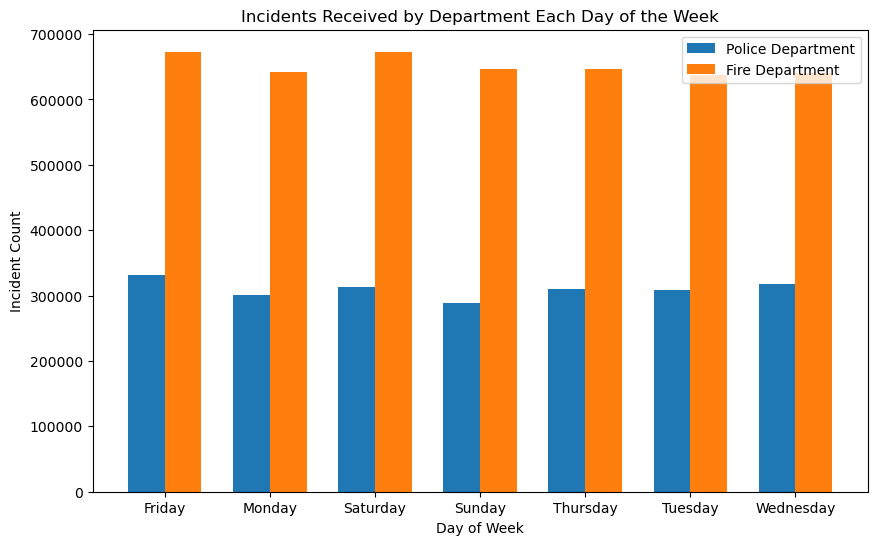

In [133]:

# Define the SQL query
QUERY = """
WITH sfpd_incidents AS (
  SELECT
    dayofweek,
    COUNT(*) AS pd_incident_count
  FROM
    `bigquery-public-data.san_francisco.sfpd_incidents`
  WHERE
    dayofweek IS NOT NULL
  GROUP BY
    dayofweek
),

sffd_calls AS (
  SELECT
    FORMAT_DATE('%A', DATE(call_date)) AS dayofweek,
    COUNT(*) AS fd_incident_count
  FROM
    `bigquery-public-data.san_francisco.sffd_service_calls`
  WHERE
    FORMAT_DATE('%A', DATE(call_date)) IS NOT NULL
  GROUP BY
    dayofweek
)

SELECT
  sfpd.dayofweek,
  sfpd.pd_incident_count,
  COALESCE(sffd.fd_incident_count, 0) AS fd_incident_count
FROM
  sfpd_incidents AS sfpd
LEFT JOIN
  sffd_calls AS sffd
ON
  sfpd.dayofweek = sffd.dayofweek
ORDER BY
  sfpd.dayofweek;
"""

# Execute the query
query_job = client.query(QUERY)

# Fetch the results
rows = query_job.result()

# Initialize empty lists to store results
dayofweek = []
pd_incident_count = []
fd_incident_count = []

# Iterate over the rows and append data to lists
for row in rows:
    dayofweek.append(row.dayofweek)
    pd_incident_count.append(row.pd_incident_count)
    fd_incident_count.append(row.fd_incident_count)

# Create a DataFrame from the lists
data = {
    'dayofweek': dayofweek,
    'pd_incident_count': pd_incident_count,
    'fd_incident_count': fd_incident_count
}
df = pd.DataFrame(data)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width for each bar
bar_width = 0.35

# Plot the incident counts for PD and FD as bars for each day of the week
ax.bar(df.index - bar_width/2, df['pd_incident_count'], bar_width, label='Police Department')
ax.bar(df.index + bar_width/2, df['fd_incident_count'], bar_width, label='Fire Department')

# Set labels and title
ax.set_xlabel('Day of Week')
ax.set_ylabel('Incident Count')
ax.set_title('Incidents Received by Department Each Day of the Week')

# Set x-axis ticks and labels
ax.set_xticks(df.index)
ax.set_xticklabels(df['dayofweek'])

# Add legend
ax.legend()

# Show plot
plt.show()


Yes there is a clear trend, it seems that they have a uniform distribution